In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('btc_data.csv')
df.head()

,Date,priceUSD,transactions,size,sentbyaddress,difficulty,hashrate,mining_profitability,sentinusdUSD,transactionfeesUSD,...,price3rsiUSD,price7rsiUSD,price14rsiUSD,price30rsiUSD,price90rsiUSD,price3rocUSD,price7rocUSD,price14rocUSD,price30rocUSD,price90rocUSD
0,2010/07/17,0.0495,235,649.653,390,181.543,2.775561e+09,154298.0,1193.0,0.000010,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
1,2010/07/18,0.0726,248,765.285,424,181.543,1.554461e+09,401834.0,2620.0,0.000243,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
2,2010/07/19,0.0859,354,756.040,553,181.543,1.551287e+09,481473.0,4048.0,0.000022,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
3,2010/07/20,0.0783,413,984.707,632,181.543,1.640430e+09,431831.0,2341.0,0.000000,...,82.751,0.0,0.0,0.0,0.0,58.099,0.0,0.0,0.0,0.0
4,2010/07/21,0.0767,256,542.483,440,181.543,1.723493e+09,460783.0,2122.0,0.000000,...,78.603,0.0,0.0,0.0,0.0,5.652,0.0,0.0,0.0,0.0


In [3]:
df_new=df.iloc[:,1:]

In [4]:
df_new.head(5)

,priceUSD,transactions,size,sentbyaddress,difficulty,hashrate,mining_profitability,sentinusdUSD,transactionfeesUSD,median_transaction_feeUSD,...,price3rsiUSD,price7rsiUSD,price14rsiUSD,price30rsiUSD,price90rsiUSD,price3rocUSD,price7rocUSD,price14rocUSD,price30rocUSD,price90rocUSD
0,0.0495,235,649.653,390,181.543,2.775561e+09,154298.0,1193.0,0.000010,0.0,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
1,0.0726,248,765.285,424,181.543,1.554461e+09,401834.0,2620.0,0.000243,0.0,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
2,0.0859,354,756.040,553,181.543,1.551287e+09,481473.0,4048.0,0.000022,0.0,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
3,0.0783,413,984.707,632,181.543,1.640430e+09,431831.0,2341.0,0.000000,0.0,...,82.751,0.0,0.0,0.0,0.0,58.099,0.0,0.0,0.0,0.0
4,0.0767,256,542.483,440,181.543,1.723493e+09,460783.0,2122.0,0.000000,0.0,...,78.603,0.0,0.0,0.0,0.0,5.652,0.0,0.0,0.0,0.0


### Dropping the priceUSD column and storing it in 'y'

In [5]:
df1=df_new.reset_index(drop=True)
n=df1.drop('priceUSD',1)


C:\Users\KIIT\AppData\Local\Temp\ipykernel_12116\646315669.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  n=df1.drop('priceUSD',1)


In [6]:
y=df1[['priceUSD']]
y

,priceUSD
0,0.0495
1,0.0726
2,0.0859
3,0.0783
4,0.0767
...,...
3483,9349.0000
3484,9394.0000
3485,9366.0000
3486,9393.0000


### Reading the MINMAX PCA dataset

In [7]:
minmaxPCA=pd.read_csv('PCA_MinMaxScaler_data1.csv')
#Adding the y column to this dataset
combined_data=minmaxPCA.assign(priceUSD=y)
combined_data.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,29,30,31,32,33,34,35,36,37,priceUSD
0,0,-3.655104,0.802061,1.817268,-1.285273,-1.640494,1.700293,-1.001414,1.101779,-0.999867,...,0.153301,-0.027586,0.225252,0.007899,0.170539,0.097393,0.146309,0.208756,1.173401,0.0495
1,1,-3.614658,0.803416,1.686412,-1.009045,-1.609771,1.699671,-0.747059,1.416030,-0.615753,...,0.261052,-0.121278,0.115798,0.108756,0.043790,0.147877,0.246103,0.141600,1.104297,0.0726
2,2,-3.636358,0.825494,1.710698,-1.048296,-1.626373,1.841579,-0.698989,1.496502,-0.499075,...,0.356758,-0.111855,0.145736,-0.008782,0.276770,0.029030,0.211571,0.214689,0.931091,0.0859
3,3,-3.641610,0.745754,1.603314,-1.195112,-0.952689,1.644297,-0.151961,1.282045,-0.588409,...,0.360500,0.076649,0.157377,-0.213748,0.256696,0.187187,0.140654,0.291811,0.537814,0.0783
4,4,-3.646880,0.760457,1.639556,-1.193579,-1.102717,1.673044,-0.434564,1.083872,-0.812450,...,0.285444,0.095544,0.122837,-0.236417,0.286961,0.041868,0.133825,0.244540,0.446112,0.0767


### Dropping the first unnamed column

In [8]:
finaldata = combined_data.iloc[: , 1:]
finaldata

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,priceUSD
0,-3.655104,0.802061,1.817268,-1.285273,-1.640494,1.700293,-1.001414,1.101779,-0.999867,0.152710,...,0.153301,-0.027586,0.225252,0.007899,0.170539,0.097393,0.146309,0.208756,1.173401,0.0495
1,-3.614658,0.803416,1.686412,-1.009045,-1.609771,1.699671,-0.747059,1.416030,-0.615753,0.506121,...,0.261052,-0.121278,0.115798,0.108756,0.043790,0.147877,0.246103,0.141600,1.104297,0.0726
2,-3.636358,0.825494,1.710698,-1.048296,-1.626373,1.841579,-0.698989,1.496502,-0.499075,0.612378,...,0.356758,-0.111855,0.145736,-0.008782,0.276770,0.029030,0.211571,0.214689,0.931091,0.0859
3,-3.641610,0.745754,1.603314,-1.195112,-0.952689,1.644297,-0.151961,1.282045,-0.588409,0.833923,...,0.360500,0.076649,0.157377,-0.213748,0.256696,0.187187,0.140654,0.291811,0.537814,0.0783
4,-3.646880,0.760457,1.639556,-1.193579,-1.102717,1.673044,-0.434564,1.083872,-0.812450,0.726314,...,0.285444,0.095544,0.122837,-0.236417,0.286961,0.041868,0.133825,0.244540,0.446112,0.0767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3483,4.827080,3.872729,-0.564335,-0.964944,0.955012,-0.208703,-0.160729,0.079293,-0.353848,0.195394,...,0.004526,0.315107,-0.007492,0.132500,0.265255,0.171378,-0.052400,0.188256,0.122504,9349.0000
3484,4.874243,4.078286,-0.498325,-1.028046,0.857928,-0.213927,-0.295887,0.083715,-0.351354,0.203269,...,-0.087225,0.475346,-0.080046,-0.166548,0.307902,0.089965,0.003772,0.139277,0.202801,9394.0000
3485,4.873536,3.950721,-0.594500,-0.959722,1.011089,-0.306760,-0.063507,0.463026,-0.061280,0.456087,...,-0.133529,0.307913,-0.229377,0.031294,0.255388,-0.049842,0.003653,0.269696,0.125988,9366.0000
3486,4.822283,4.116169,-0.434845,-0.844725,0.491708,-0.136111,-0.857335,0.091674,-0.184611,0.583483,...,-0.138564,0.315845,-0.106430,0.072532,0.355768,0.043088,-0.011649,0.177111,0.143189,9393.0000


In [9]:
X = finaldata.iloc[:, :-1].values
y = finaldata.iloc[:, -1].values


### Splitting the dataset into the Training set and Test set

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


### Training the Linear Regression model on the Training set

In [24]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### Printing R2 score

In [25]:
r_squared = regressor.score(X, y)
print(r_squared)

0.9912317839223562


In [12]:
y_pred = regressor.predict(X_test)

### Displaying adjusted R2

In [27]:
1 - (1-regressor.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)

0.9911351784683259

### Accuracy on linear regression

In [20]:
regressor.score(X_train,y_train)
pred=regressor.predict(X_test)
regressor.score(X_test,y_test)

0.9913277109132441

### Defining model

### Training the Kernel SVM model on the Training set

In [33]:
from sklearn import preprocessing
from sklearn import utils
lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(y_train)
print(training_scores_encoded)
print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target(y_train.astype('int')))
print(utils.multiclass.type_of_target(training_scores_encoded))

[1767 2058  985 ... 1049 2116 2661]
continuous
multiclass
multiclass


### Applying grid search to find best model and the best parameters

from sklearn.model_selection import GridSearchCV
parameters = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

In [49]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

In [50]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

[CV] END ......................C=10, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ......................C=10, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ......................C=10, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ......................C=10, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ...................

ValueError: 
All the 240 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\KIIT\anaconda3\envs\test\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\KIIT\anaconda3\envs\test\lib\site-packages\sklearn\svm\_base.py", line 182, in fit
    y = self._validate_targets(y)
  File "C:\Users\KIIT\anaconda3\envs\test\lib\site-packages\sklearn\svm\_base.py", line 735, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\KIIT\anaconda3\envs\test\lib\site-packages\sklearn\utils\multiclass.py", line 200, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'


### Visualising the Training set results

### Visualising the Test set results

### Gradient boosting Model and its parameter

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor()
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]
                 }

In [16]:
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBR.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [100, 500, 1000, 1500],
                         'subsample': [0.9, 0.5, 0.2, 0.1]})

In [18]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)


 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.03, max_depth=6, n_estimators=1000,
                          subsample=0.2)

 The best score across ALL searched params:
 0.992172378839305

 The best parameters across ALL searched params:
 {'learning_rate': 0.03, 'max_depth': 6, 'n_estimators': 1000, 'subsample': 0.2}


### Training the Random forest regression model on the whole dataset

In [36]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X, y)

RandomForestRegressor(n_estimators=10, random_state=0)

### Randomforest regressor using GridSearchCV 

In [47]:
from sklearn.metrics import r2_score
def Grid_Search_CV_RFR(X_train, y_train):
    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import ShuffleSplit
    from sklearn.ensemble import RandomForestRegressor
    

    estimator = RandomForestRegressor()
    param_grid = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

    grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)

    grid.fit(X_train, y_train)

    return grid.best_score_ , grid.best_params_

def RFR(X_train, X_test, y_train, y_test, best_params):
    from sklearn.ensemble import RandomForestRegressor
    estimator = RandomForestRegressor(n_jobs=-1).set_params(**best_params)
    estimator.fit(X_train,y_train)
    y_predict = estimator.predict(X_test)
    print ("R2 score:",r2_score(y_test,y_predict))
    return y_test,y_predict

In [48]:
for i in range(5):
    print ("Loop: " , i)
    print ("--------------")
    best_score, best_params = Grid_Search_CV_RFR(X_train, y_train)
    y_test , y_predict = RFR(X_train, X_test, y_train, y_test, best_params)
    print ("Best Score:" ,best_score)
    print ("Best params:",best_params)

Loop:  0
--------------


C:\Users\KIIT\anaconda3\envs\test\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\KIIT\anaconda3\envs\test\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


R2 score: 0.9935314054516078
Best Score: 0.9922151529854562
Best params: {'bootstrap': True, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 30}
Loop:  1
--------------


C:\Users\KIIT\anaconda3\envs\test\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\KIIT\anaconda3\envs\test\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


R2 score: 0.9931043583105772
Best Score: 0.9925767230130992
Best params: {'bootstrap': True, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 30}
Loop:  2
--------------


C:\Users\KIIT\anaconda3\envs\test\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\KIIT\anaconda3\envs\test\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


R2 score: 0.9939930321774656
Best Score: 0.9922341110609185
Best params: {'bootstrap': True, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 30}
Loop:  3
--------------


C:\Users\KIIT\anaconda3\envs\test\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\KIIT\anaconda3\envs\test\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


R2 score: 0.9947399339785231
Best Score: 0.9926341619832322
Best params: {'bootstrap': True, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 30}
Loop:  4
--------------


C:\Users\KIIT\anaconda3\envs\test\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\KIIT\anaconda3\envs\test\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


R2 score: 0.9937031994871356
Best Score: 0.9925736299365532
Best params: {'bootstrap': True, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 30}


from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=256, verbose=2)

### LSTMs expect the data to be in 3 dimensions. We need to split the data into sequences of some preset length. The shape we want to obtain is:

In [66]:

SEQ_LEN = 100

def to_sequences(data, seq_len):
    d = []

    for index in range(len(data) - seq_len):
        d.append(data[index: index + seq_len])

    return np.array(d)

def preprocess(data_raw, seq_len, train_split):

    data = to_sequences(data_raw, seq_len)

    num_train = int(train_split * data.shape[0])

    X_train = data[:num_train, :-1, :]
    y_train = data[:num_train, -1, :]

    X_test = data[num_train:, :-1, :]
    y_test = data[num_train:, -1, :]

    return X_train, y_train, X_test, y_test


X_train, y_train, X_test, y_test =\
 preprocess(finaldata, SEQ_LEN, train_split = 0.95)

In [73]:
from keras.models import Sequential
import keras.utils
from keras import utils as np_utils
from tensorflow.keras.layers import Bidirectional 
DROPOUT = 0.2
WINDOW_SIZE = SEQ_LEN - 1

model = keras.Sequential()

model.add(Bidirectional(
  CuDNNLSTM(WINDOW_SIZE, return_sequences=True),
  input_shape=(WINDOW_SIZE, X_train.shape[-1])
))
model.add(Dropout(rate=DROPOUT))

model.add(Bidirectional(
  CuDNNLSTM((WINDOW_SIZE * 2), return_sequences=True)
))
model.add(Dropout(rate=DROPOUT))

model.add(Bidirectional(
  CuDNNLSTM(WINDOW_SIZE, return_sequences=False)
))

model.add(Dense(units=1))

model.add(Activation('linear'))

NameError: name 'CuDNNLSTM' is not defined

### Building the model

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout

In [12]:
classifier = Sequential()
classifier.add(Dense(units=735,kernel_initializer='he_normal',activation='relu'))
Dropout(0.2)
classifier.add(Dense(units=32,kernel_initializer='normal',activation='relu',kernel_regularizer = 'l1'))
Dropout(0.2)
classifier.add(Dense(units=8,kernel_initializer='normal',activation='relu'))
classifier.add(Dense(units=8,kernel_initializer='normal',activation='relu'))
#Adding the output layer
classifier.add(Dense(1,kernel_initializer='normal',activation='linear'))

In [13]:
classifier.compile(optimizer='adam',loss='mean_absolute_error',metrics=['mean_absolute_error'])

In [14]:
model_history=classifier.fit(X_train,y_train,validation_split=0.2,batch_size=16,epochs=100)

Epoch 1/100
140/140 [==============================] - 1s 5ms/step - loss: 2116.8113 - mean_absolute_error: 2113.4070 - val_loss: 2169.3162 - val_mean_absolute_error: 2160.4958
Epoch 2/100
140/140 [==============================] - 0s 3ms/step - loss: 1057.4983 - mean_absolute_error: 1033.9836 - val_loss: 406.0324 - val_mean_absolute_error: 376.6014
Epoch 3/100
140/140 [==============================] - 0s 3ms/step - loss: 247.3941 - mean_absolute_error: 216.8650 - val_loss: 210.0865 - val_mean_absolute_error: 179.0924
Epoch 4/100
140/140 [==============================] - 0s 3ms/step - loss: 176.2959 - mean_absolute_error: 145.5588 - val_loss: 182.5172 - val_mean_absolute_error: 152.0863
Epoch 5/100
140/140 [==============================] - 0s 3ms/step - loss: 154.5115 - mean_absolute_error: 123.9923 - val_loss: 160.9641 - val_mean_absolute_error: 130.4518
Epoch 6/100
140/140 [==============================] - 0s 3ms/step - loss: 139.9216 - mean_absolute_error: 109.4904 - val_loss: 1

Epoch 49/100
140/140 [==============================] - 0s 3ms/step - loss: 66.5729 - mean_absolute_error: 43.3348 - val_loss: 75.2412 - val_mean_absolute_error: 52.0372
Epoch 50/100
140/140 [==============================] - 0s 3ms/step - loss: 63.3829 - mean_absolute_error: 40.1896 - val_loss: 73.5875 - val_mean_absolute_error: 50.4605
Epoch 51/100
140/140 [==============================] - 0s 3ms/step - loss: 64.3946 - mean_absolute_error: 41.3675 - val_loss: 71.2614 - val_mean_absolute_error: 48.2969
Epoch 52/100
140/140 [==============================] - 0s 3ms/step - loss: 61.7172 - mean_absolute_error: 38.8613 - val_loss: 74.8366 - val_mean_absolute_error: 52.0432
Epoch 53/100
140/140 [==============================] - 0s 3ms/step - loss: 62.7763 - mean_absolute_error: 40.0708 - val_loss: 98.7459 - val_mean_absolute_error: 75.9218
Epoch 54/100
140/140 [==============================] - 0s 2ms/step - loss: 61.6144 - mean_absolute_error: 39.0391 - val_loss: 81.5255 - val_mean_abso

140/140 [==============================] - 0s 3ms/step - loss: 47.2103 - mean_absolute_error: 29.1850 - val_loss: 67.4041 - val_mean_absolute_error: 49.5322
Epoch 98/100
140/140 [==============================] - 0s 3ms/step - loss: 47.6213 - mean_absolute_error: 29.7212 - val_loss: 61.0008 - val_mean_absolute_error: 43.0815
Epoch 99/100
140/140 [==============================] - 0s 3ms/step - loss: 49.9741 - mean_absolute_error: 32.1116 - val_loss: 62.9764 - val_mean_absolute_error: 45.1110
Epoch 100/100
140/140 [==============================] - 0s 3ms/step - loss: 51.7100 - mean_absolute_error: 33.8957 - val_loss: 72.0888 - val_mean_absolute_error: 54.3689


In [15]:
train_mse = classifier.evaluate(X_train, y_train, verbose=0)
test_mse = classifier.evaluate(X_test, y_test, verbose=0)

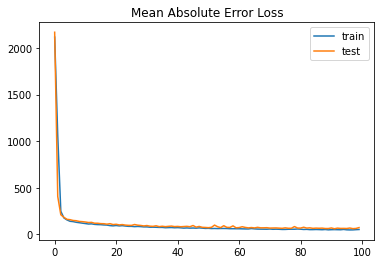

In [16]:
import matplotlib.pyplot as plt
plt.title('Mean Absolute Error Loss')
plt.plot(model_history.history['loss'], label='train')
plt.plot(model_history.history['val_loss'], label='test')
plt.legend()
plt.show()